In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
tickers=['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='1995-1-1')['Adj Close']

In [5]:
mydata.info() 
##data is clean complete and well organized containing 
#the same amount of observations for each of the four securities


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6397 entries, 1995-01-03 to 2020-05-29
Data columns (total 4 columns):
PG      6397 non-null float64
MSFT    6397 non-null float64
F       6397 non-null float64
GE      6397 non-null float64
dtypes: float64(4)
memory usage: 249.9 KB


In [6]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.406834,4.186858,2.729230
1995-01-04,6.269589,2.424330,4.299507,2.729230
1995-01-05,6.180927,2.384342,4.261956,2.735919
1995-01-06,6.193593,2.424330,4.261956,2.722540
1995-01-09,6.168259,2.409335,4.337057,2.695783


In [7]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-05-22,112.599998,183.509995,5.65,6.41
2020-05-26,112.029999,181.570007,5.84,6.80
2020-05-27,113.889999,181.809998,6.03,7.29
2020-05-28,116.059998,181.399994,5.85,6.78
2020-05-29,115.919998,183.250000,5.71,6.57


In [8]:
## FORMULA that normalized data to 100 = (adjusted price value of a certain date / the very first number ) *100
## all lines initiate from the vertical axis and the point corresponding to 100 to compare the behaviour 
## of the four different stocks as if they were all starting from the same value 100.

In [9]:
mydata.iloc[0] #first row

PG      6.320252
MSFT    2.406834
F       4.186858
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

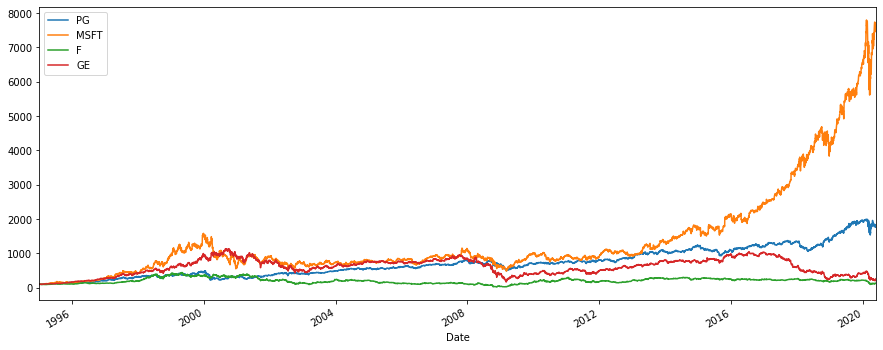

In [10]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));
plt.show()

# Calculate the Return of a Portfolio of securities 

In [11]:
returns=(mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [12]:
weights=np.array([0.25,0.25,0.25,0.25])

In [13]:
np.dot(returns,weights)  #matrix multiplication in mathmatics np.dot() --calculate vector or matrix products

array([        nan,  0.00653966, -0.00922981, ...,  0.03062937,
       -0.02075282, -0.01147821])

In [14]:
##assign the average yearly returns of the four stocks to the variable annual returns
annual_returns=returns.mean()*250

In [15]:
annual_returns

PG      0.139702
MSFT    0.219442
F       0.091468
GE      0.084436
dtype: float64

In [16]:
np.dot(annual_returns,weights)

0.13376207541611906

In [17]:
pfolio_1= str(round(np.dot(annual_returns,weights), 5)*100) + ' %'

In [18]:
print(pfolio_1)

13.376 %


In [19]:
Weights_2=np.array([0.4,0.4,0.15,0.05])

In [23]:
pfolio_2=str(round(np.dot(annual_returns,Weights_2),5)*100)+ ' %'

In [24]:
print (pfolio_1)

13.376 %


In [25]:
print (pfolio_2)

16.16 %
